In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
np.random.seed(42)

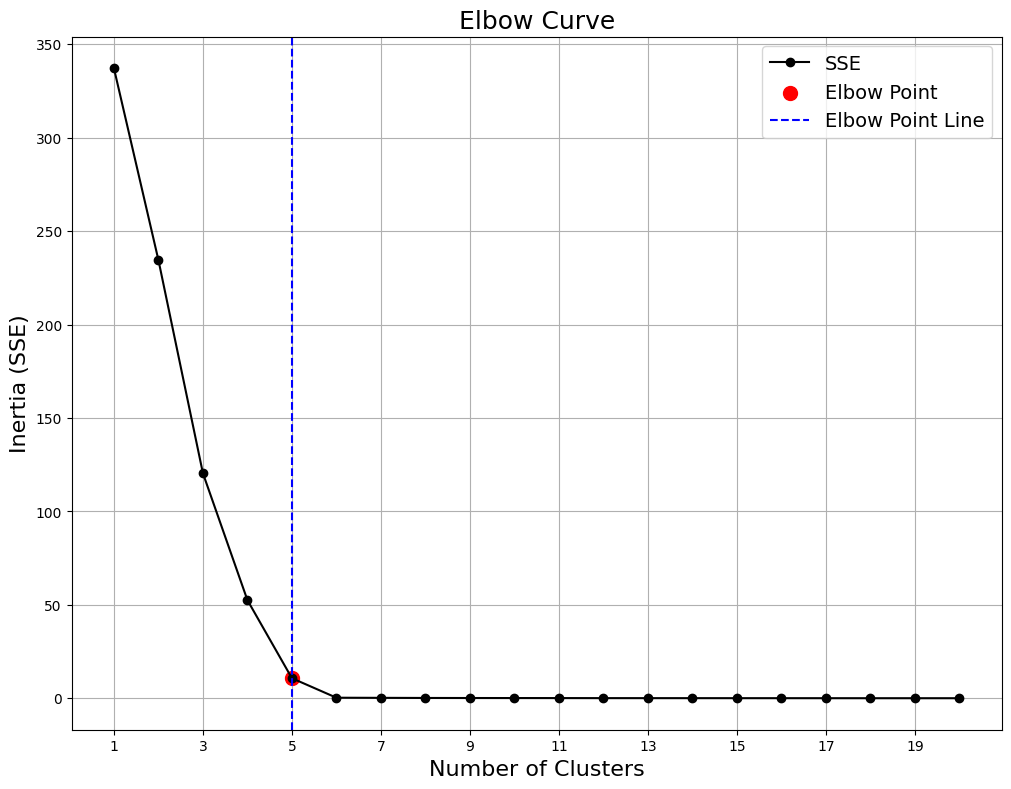

The elbow point is at 5 clusters.
Cluster Summary:
          Quantum dot  Grahpene    Carbon       CNT  Mesoporous Carbon  \
Cluster                                                                 
0           0.000000  0.000000  0.000000  0.967573           0.000000   
1           0.000000  0.000000  0.968167  0.000000           0.000000   
2           0.000000  0.946722  0.000000  0.000000           0.000000   
3           0.000000  0.000000  0.000000  0.000000           0.000000   
4           0.160612  0.000000  0.000000  0.000000           0.791442   

         Carbon Foam  Pyridinic-N  Pyrrolic-N  Grapitic-N  Quaternary-N  \
Cluster                                                                   
0           0.000000     0.013745    0.005649    0.011295      0.001485   
1           0.000000     0.007064    0.006425    0.005563      0.003229   
2           0.000000     0.024578    0.012379    0.012569      0.000000   
3           0.958672     0.016457    0.013852    0.000000    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
AA = "C:/Users/ganes/onedrive/Desktop/AI/NCCO2R/NC-Final.xlsx"
X = pd.read_excel(AA, usecols='A:L') 
Y = pd.read_excel(AA, usecols='R')

# Step 1: Determine the optimal number of clusters using the elbow method
sse = []
for E in range(1, 21):
    kmeans = KMeans(n_clusters=E, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Function to calculate the elbow point
def find_elbow_point(sse):
    """
    Function to calculate the elbow point using the maximum distance to a straight line approach.
    """
    x = range(1, len(sse) + 1)
    line = np.array([x[0], sse[0], x[-1], sse[-1]])  # Line from the first to the last point
    distances = []
    for i in range(len(sse)):
        # Line equation: y = mx + c
        x0, y0 = line[0], line[1]
        x1, y1 = line[2], line[3]
        m = (y1 - y0) / (x1 - x0)
        c = y0 - m * x0
        # Distance of point (x[i], sse[i]) from line
        distance = abs(m * x[i] - sse[i] + c) / np.sqrt(m**2 + 1)
        distances.append(distance)
    return distances.index(max(distances)) + 1  # +1 because cluster numbers start from 1

# Find the elbow point
elbow_point = find_elbow_point(sse)

# Plot the elbow curve with the elbow point marked
plt.figure(figsize=(12, 9))
plt.plot(range(1, 21), sse, "k", marker="o", label="SSE")
plt.scatter(elbow_point, sse[elbow_point - 1], color='red', s=100, label="Elbow Point")
plt.axvline(x=elbow_point, color='blue', linestyle='--', label="Elbow Point Line")  # Dashed vertical line
plt.xticks(range(1, 21, 2))
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel('Inertia (SSE)', fontsize=16)
plt.title('Elbow Curve', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

print(f"The elbow point is at {elbow_point} clusters.")

# Step 2: Apply K-means clustering with the chosen number of clusters
n_clusters = elbow_point  # Use the elbow point as the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Add cluster labels to the DataFrame
df_k = pd.read_excel(AA, usecols='A:L')  # Load full dataset
df_k['Cluster'] = kmeans.fit_predict(X)

# Group by the 'Cluster' column
cluster_summary = df_k.groupby('Cluster').mean()

# Display the cluster summary
print("Cluster Summary:\n", cluster_summary)


In [3]:
import pandas as pd

# Create a dictionary of the cluster summary data
data = {
    'Cluster': [0, 1, 2, 3, 4],
    'Quantum dot': [0.0, 0.0, 0.0, 0.0, 0.160612],
    'Graphene': [0.0, 0.0, 0.946722, 0.0, 0.0],
    'Carbon': [0.0, 0.968167, 0.0, 0.0, 0.0],
    'CNT': [0.967573, 0.0, 0.0, 0.0, 0.0],
    'Mesoporous Carbon': [0.0, 0.0, 0.0, 0.0, 0.791442],
    'Carbon Foam': [0.0, 0.0, 0.0, 0.958672, 0.0],
    'Pyridinic-N': [0.013745, 0.007064, 0.024578, 0.016457, 0.017764],
    'Pyrrolic-N': [0.005649, 0.006425, 0.012379, 0.013852, 0.009472],
    'Grapitic-N': [0.011295, 0.005563, 0.012569, 0.0, 0.016864],
    'Quaternary-N': [0.001485, 0.003229, 0.0, 0.00591, 0.0],
    'N-Oxide': [0.000246, 0.002319, 0.00379, 0.005109, 0.003845],
    'S': [0.0, 0.002915, 0.0, 0.0, 0.0]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Set 'Cluster' as the index
df.set_index('Cluster', inplace=True)

# Export the DataFrame to an Excel file
df.to_excel('cluster_summary.xlsx')

print("Cluster summary exported successfully to 'cluster_summary.xlsx'")


Cluster summary exported successfully to 'cluster_summary.xlsx'


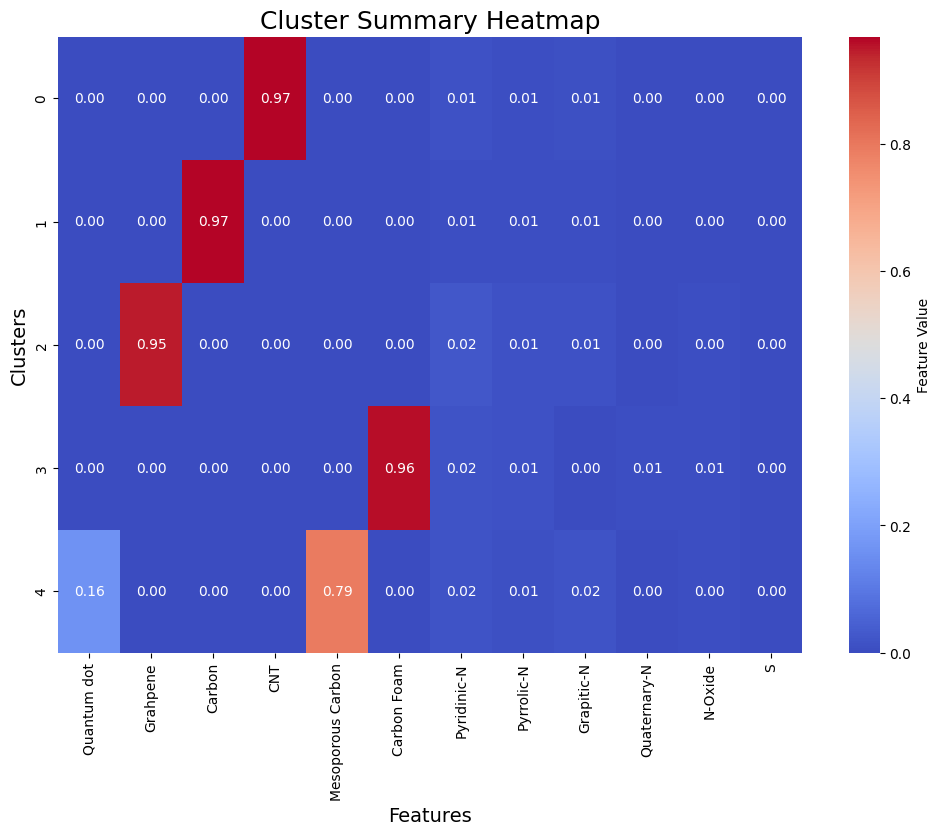

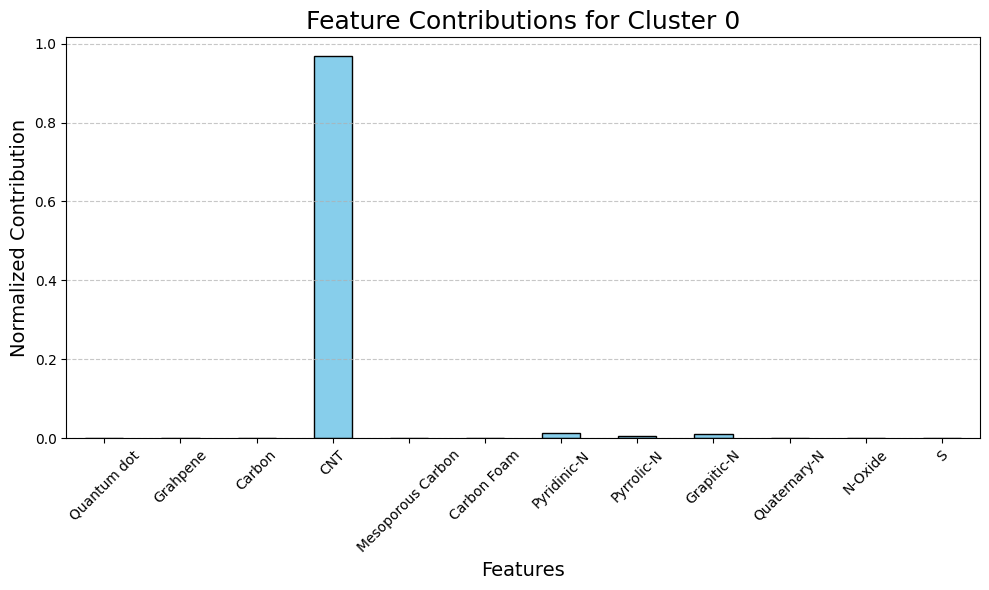

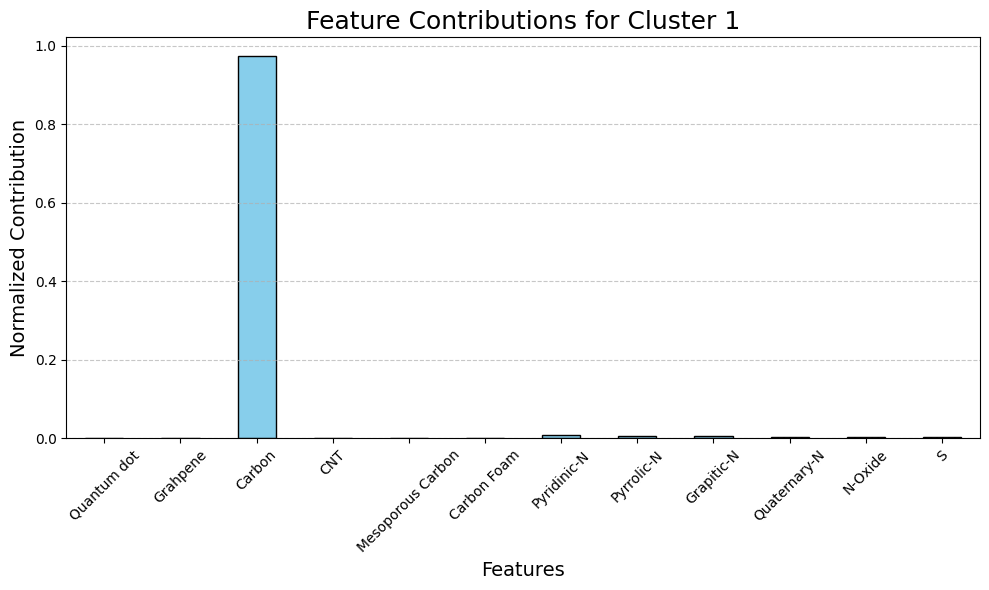

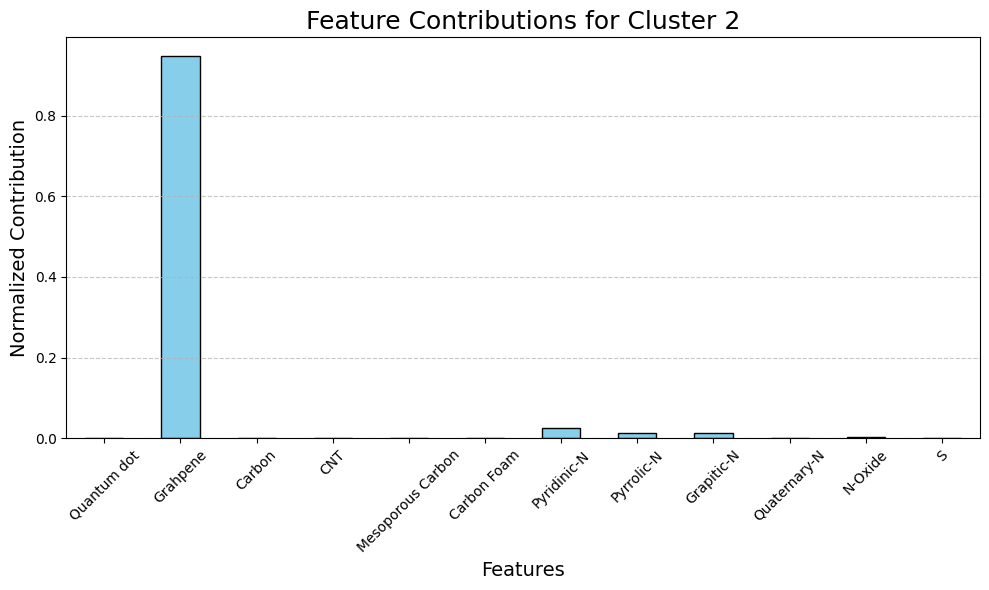

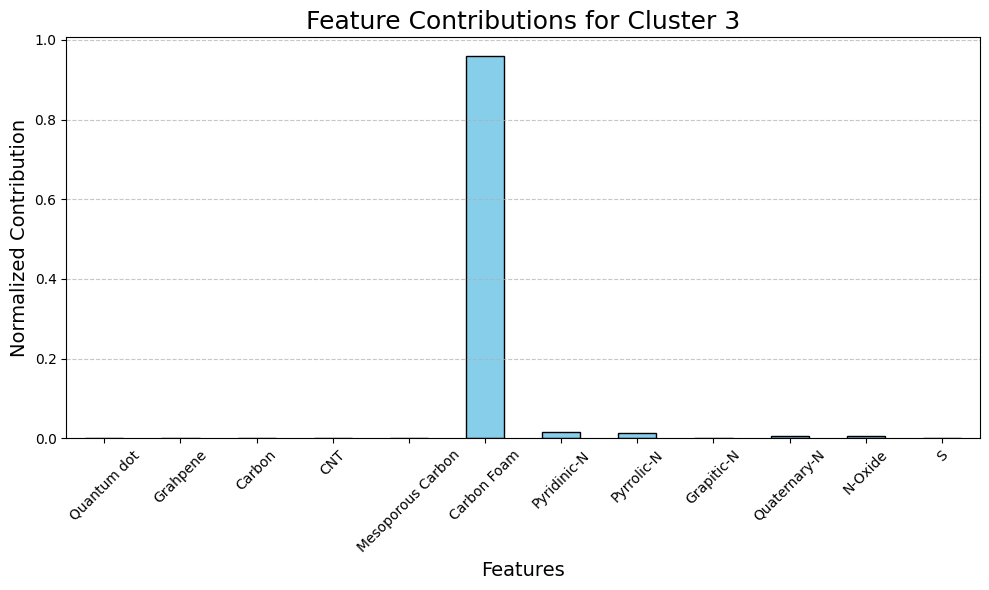

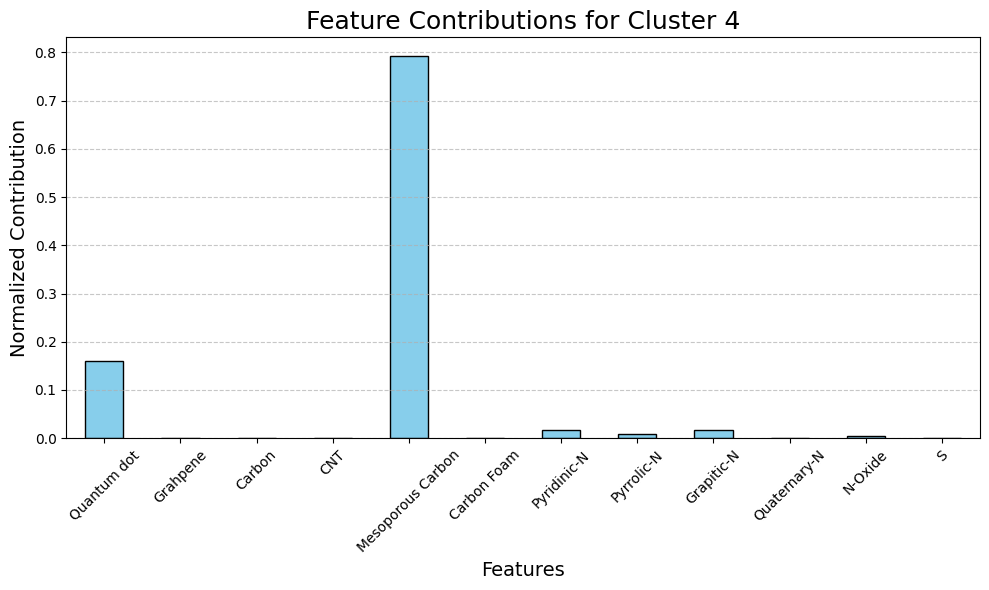

In [4]:
import seaborn as sns

# Heatmap for cluster summary
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Feature Value"})
plt.title("Cluster Summary Heatmap", fontsize=18)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Clusters", fontsize=14)
plt.show()

# Cluster-specific feature contributions as bar charts
# Normalize features for better visualization
normalized_summary = cluster_summary.div(cluster_summary.sum(axis=1), axis=0)

# Plot bar chart for each cluster
for cluster in normalized_summary.index:
    plt.figure(figsize=(10, 6))
    normalized_summary.loc[cluster].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Feature Contributions for Cluster {cluster}", fontsize=18)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Normalized Contribution", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


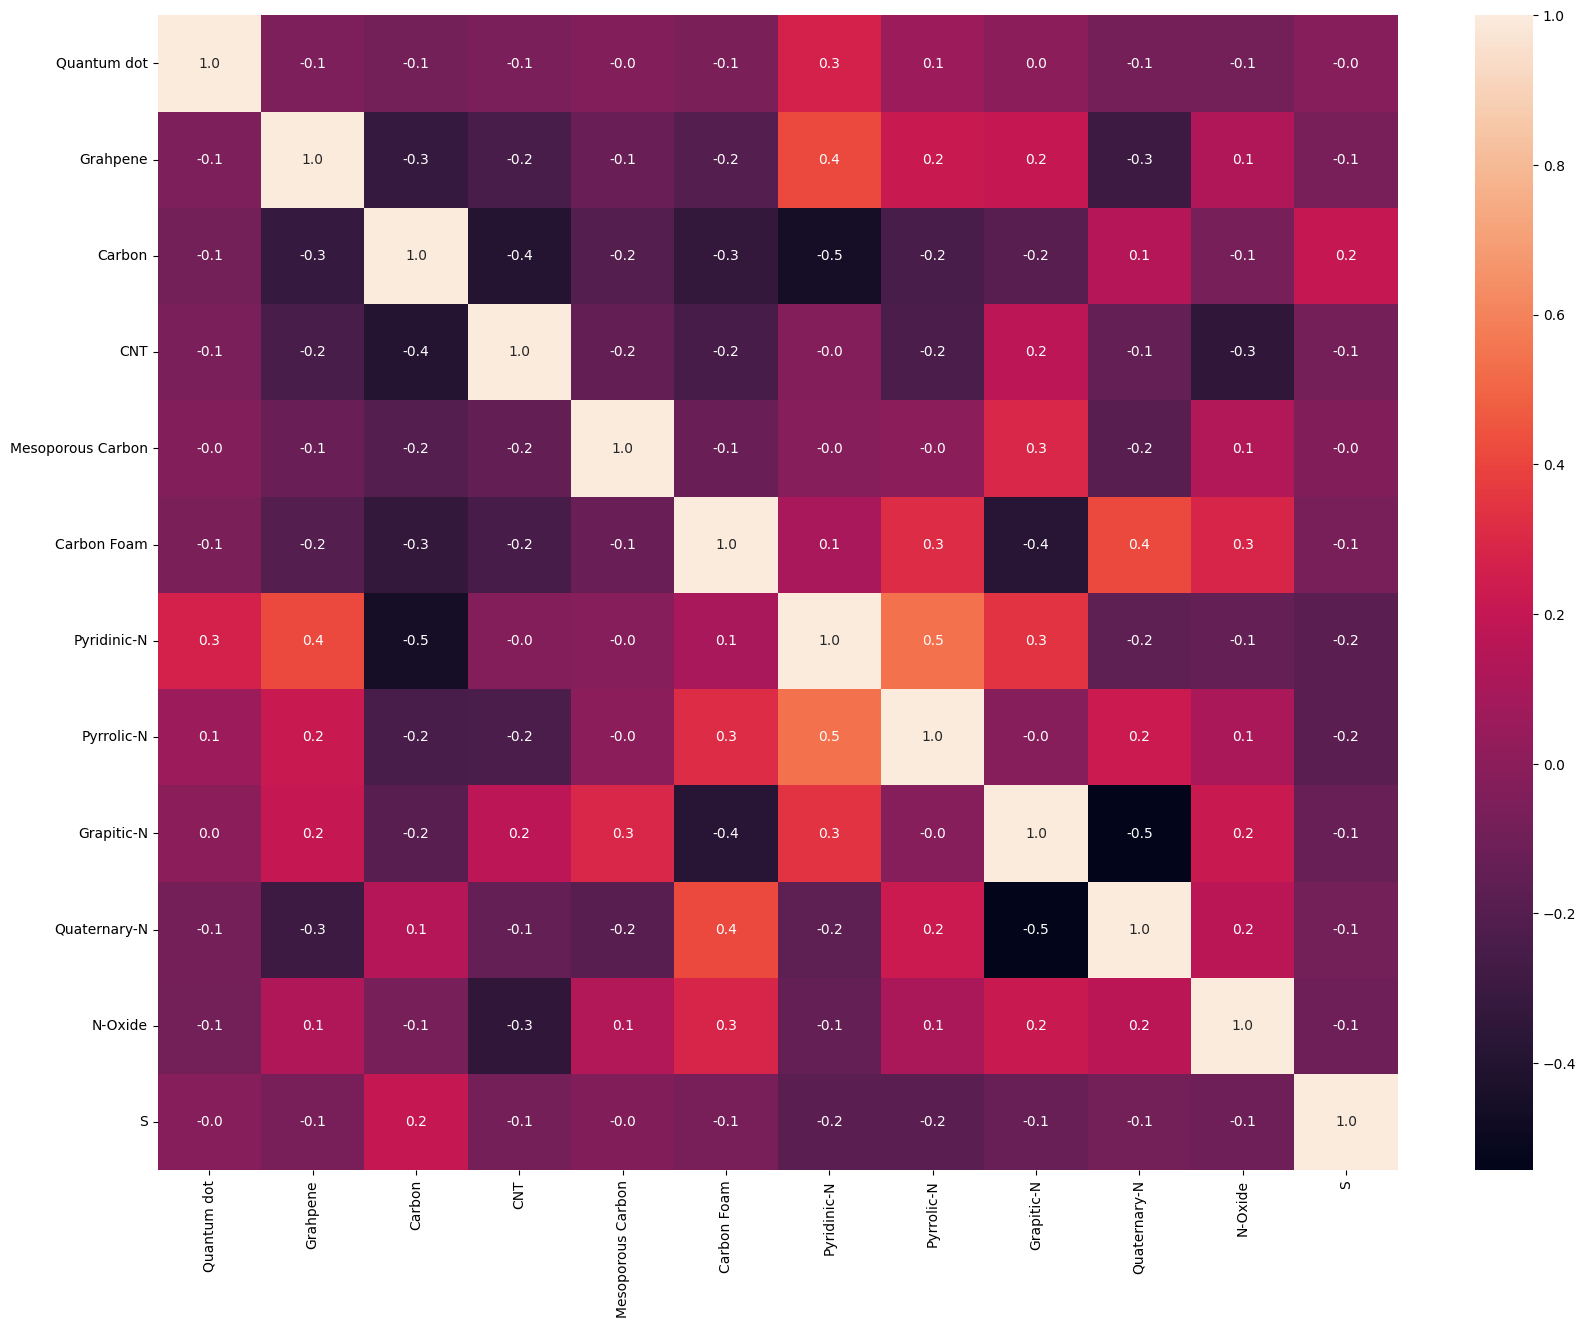

In [5]:
corr=X.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr,annot=True, annot_kws={'size': 10}, fmt=".1f")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


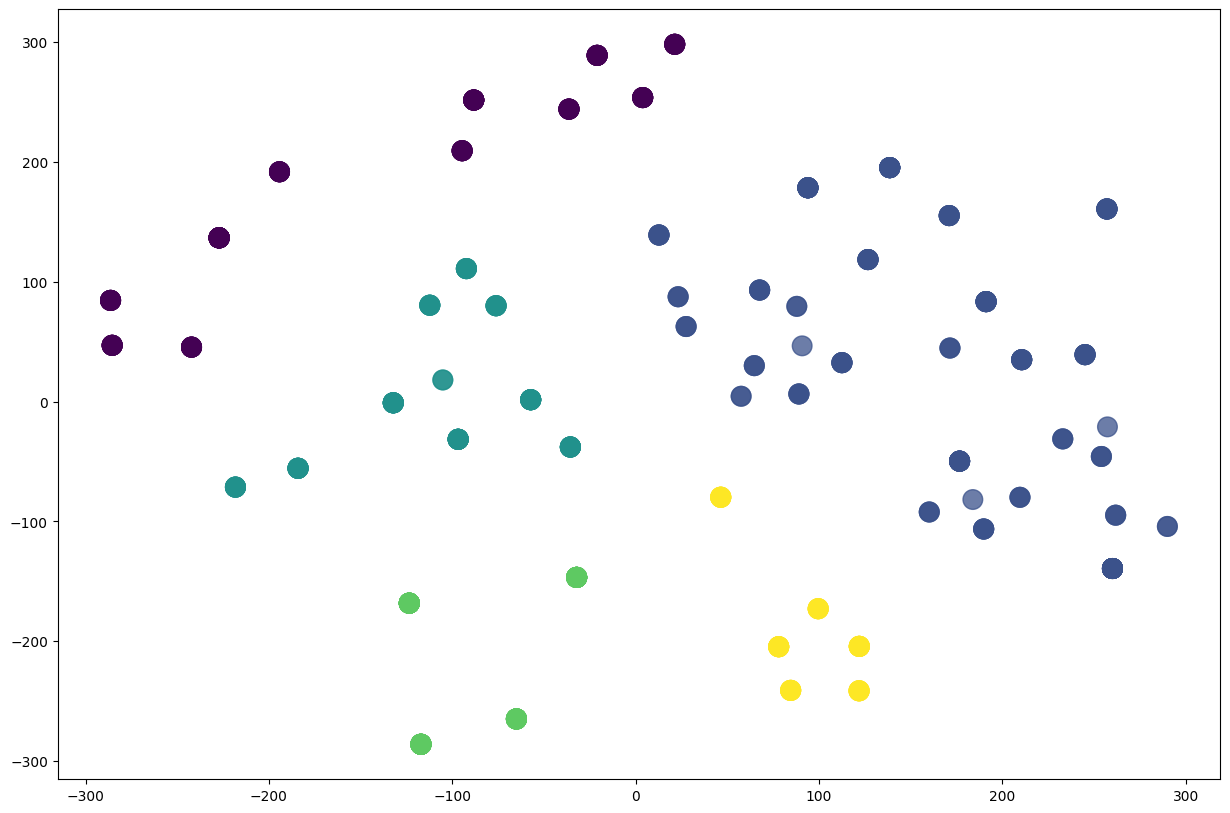

In [6]:
cluster = KMeans(n_clusters=5)
cluster.fit(X)
cluster_predictions = cluster.predict(X)
tsne = TSNE(n_components=2, random_state=1, n_iter=1000, perplexity=40, init="pca", learning_rate="auto")
tsne_EP = tsne.fit_transform(X)
plt.figure(figsize=(15,10))
plot2 = plt.scatter(x=tsne_EP[:,0], y=tsne_EP[:,1], c=cluster_predictions, s=200, alpha=0.75)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.show()